- author: Lee Meng
- date: 2018-12-17 08:00
- title: 我如何利用自然語言處理以及 Keras 在第一次 Kaggle 競賽達到前 30 %
- slug: how-i-use-nlp-and-keras-to-identify-fake-news-and-got-top-30-on-my-first-kaggle-competition
- tags: 自然語言處理, Keras, Python, 深度學習
- description:
- summary:
- image: emma-frances-logan-142162-unsplash.jpg
- image_credit_url: https://unsplash.com/photos/PVIbUkN_wCQ?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText
- status: draft

自從[ 11 月從比利時 EMNLP]({filename}20181113-emnlp-2018.ipynb) 回來後，最近工作之餘都在學習[自然語言處理](https://zh.wikipedia.org/wiki/%E8%87%AA%E7%84%B6%E8%AF%AD%E8%A8%80%E5%A4%84%E7%90%86)（Natural Language Processing, 後簡稱為 NLP）。依據維基百科的定義：

!quote
- 自然語言處理（NLP）是計算機科學以及人工智慧的子領域，專注在如何讓計算機處理並分析大量（人類的）自然語言數據。NLP 常見的挑戰有語音辨識、自然語言理解、機器翻譯以及自然語言的生成。

在這篇「短篇小說」裡頭，我將描述自己怎麼陰錯陽差地成為一個辨別假新聞的 Kaggle 競賽者，並且如何利用最近學到的 NLP 知識以及深度學習框架 [Keras](https://keras.io/) 來教會[神經網路（Neural Network）](https://zh.wikipedia.org/wiki/%E4%BA%BA%E5%B7%A5%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C)自動辨別手中的假新聞。

後面你會看到，這些模型表現得還不錯！

!image
- nlp-kaggle-intro/robot-read.jpg

在這篇文章裡頭，我會努力用簡單詞彙來說明故事中出現的深度學習及 NLP 概念，同時也會在文末附上[不少實用的學習資源以及文章](#換你上場：3-門推薦課程)供你閱讀後進一步探索。

本文希望能讓對人工智慧、深度學習或是 NLP 有興趣的你，在閱讀本故事之後能得到一些啟發與方向，展開自己的 NLP 之旅。

## 本文章節
- [30 秒懶人包](#30-秒懶人包)
- [意料之外的 Kaggle 競賽](#意料之外的-Kaggle-競賽)
- [假新聞分類任務](#假新聞分類任務)
- [用直覺找出第一條底線](#用直覺找出第一條底線)
- [資料前處理：讓機器能夠處理文字](#資料前處理：讓機器能夠處理文字)
- [有記憶的循環神經網路](#有記憶的循環神經網路_1)
- [記憶力好的 LSTM](#記憶力好的-LSTM)
- [暹羅貓拯救世界](#)
- [深度學習 3 步驟](#)
- [第一個模型結果](#)
- [站在巨人的肩膀上](#)
- [輪到 Colab 登場](#)
- [持續改進結果](#)
- [所以 AI 學到了什麼](#)
- [結語](#結語)
- [換你上場：3 門推薦課程](#換你上場：3-門推薦課程)
- [更多優質參考資料](#)

## 30 秒懶人包

沒錯，光看上面的章節數，你應該就能猜到無法在 10 分鐘內 KO 這篇文章。

針對那些時間寶貴的你，我在這邊直接列出本文的 3 個重要訊息：
1. NLP 接下來的發展只會更加快速，就連一般人也能弄出厲害的語言處理模型
2. 站在巨人的肩膀之上，活用前人成果與經驗能讓你前進地更快，更有效率
3. 深度學習發展神速，令人望之生卻。但你總是要[從某個地方好好地從頭學習基礎](#換你上場：3-門推薦課程)

這些陳述看似陳腔濫調，但希望好奇心能讓你實際閱讀本文，找出構成這些結論的蛛絲馬跡。

讓我們開始吧！

## 意料之外的 Kaggle 競賽

[Kaggle](https://www.kaggle.com/) 是一個資料科學家以及機器學習愛好者互相切磋的數據建模和數據分析競賽平台。

本文提到的 Kaggle 競賽是 [WSDM - Fake News Classification](https://www.kaggle.com/c/fake-news-pair-classification-challenge)。

此競賽的目的在於想辦法自動找出假新聞以節省人工檢查的成本。資料集則是由中國的手機新聞應用：[今日頭條](https://www.toutiao.com/)的母公司[字節跳動](https://zh.wikipedia.org/wiki/%E5%AD%97%E8%8A%82%E8%B7%B3%E5%8A%A8)所提出的。（知名的抖音也是由該公司的產品）

!image
- nlp-kaggle-intro/wsdm-intro.jpg
- 本文的 Kaggle 競賽
- https://www.kaggle.com/c/fake-news-pair-classification-challenge

而因為我所任職的 [SmartNews](https://www.smartnews.com/en/) 主打產品也是手機新聞應用（主要針對日本與美國用戶），像是這種哪個企業又辦了 Kaggle 競賽、又開發什麼新功能等等的消息都會在公司內部流動。

話雖如此，在我從同事得知這個為期一個月的競賽時，事實上離截止時間只剩一個禮拜了！（傻眼）

!image
- emnlp2018/emnlp-entrance.jpg
- 今年 10 月底參加的 EMNLP
- {filename}20181113-emnlp-2018.ipynb

但心念一轉，想說從 [EMNLP 會議]({filename}20181113-emnlp-2018.ipynb)回來後也學了一些不少 NLP 知識，不仿就趁著這個機會，試著在一週內兜出個模型來解決這個問題。

名符其實的「志在參加」。

## 假新聞分類任務
既然決定要參加了，當然得看看資料集長的什麼樣子。訓練資料集（Training Set）約有 32 萬筆數據，而測試資料集（Test Set）則約為 8 萬筆。而訓練資料集一部份的內容如下：

!image
- nlp-kaggle-intro/view-data-on-kaggle.jpg

要了解此資料集，讓我們先專注在第一列（Row），大蒜與地溝油新聞的每一個欄位。

（部分讀者可能會對簡體中文表示意見，但請體諒我沒有辦法事先將此大量數據全部轉為繁體）

第一欄位 `title1_zh` 代表的是「已知假新聞」 A 的中文標題：

```text
用大蒜鉴别地沟油的方法,怎么鉴别地沟油
```

而第二欄位 `title2_zh` 則是一筆新的新聞 B 的中文標題，我們還不知道它的真偽：

```text
翻炒大蒜可鉴别地沟油
```

要判斷第二欄中的新聞標題是否為真，我們可以把它跟已知的第一篇假新聞做比較，分為 3 個類別：
- `unrelated`：B 跟 A 沒有關係
- `agreed`：B 同意 A 的敘述
- `disagreed`：B 不同意 A 的敘述

如果新聞 B 同意假新聞 A 的敘述的話，我們可以將 B 也視為一個假新聞；而如果 B 不同意假新聞 A 的敘述的話，我們可以放心地將 B 新聞釋出給一般大眾查看；如果 B 與 A 無關的話，可以考慮再進一步處理 B。（這處理不在本文討論範疇內）

!image
- nlp-kaggle-intro/chris-liverani-552022-unsplash.jpg
- 如果 B 新聞「同意」假新聞 A 的話，我們大可將 B 新聞也視為假新聞，最後將其屏除

接著看到資料集（下圖）第一列最右邊的 `label` 欄位為 `agreed`，代表 B 同意 A 的敘述，則我們可以判定 B 也是假新聞。

!image
- nlp-kaggle-intro/view-data-on-kaggle.jpg

這就是一個簡單的「假新聞分類問題」：給定一個成對的新聞標題 A & B，在已知 A 為假新聞的情況下，預測 B 跟 A 之間的關係。其關係可以分為 3 個類別：
- unrelated
- agreed
- disagreed

順帶一提，上圖同時包含了 3 個類別的例子供你了解不同分類的實際情況。

第 3、 4 欄位則為新聞標題的英文翻譯。而因為該翻譯為機器翻譯，不一定能 100% 正確反映本來中文新聞想表達的意思，因此接下來的文章會忽視這兩個欄位，只使用簡體中文的新聞標題來訓練 NLP 模型。

## 用直覺找出第一條底線

現在任務目標很明確了，我們就是要將有 32 萬筆數據的訓練資料集（Training Set）交給我們的 NLP 模型，讓它「閱讀」每一列裡頭的假新聞 A 與新聞 B 的標題、以及它們之間的關係（不相關、B 同意 A、B 不同意 A）。

理想上，在看過一大堆這種例子以後，我們的模型就能夠「學會」一些法則，讓它在被給定一組從來沒看過的假新聞標題 A 以及新聞標題 B 的情況下，也能正確判斷新聞 A 與新聞 B 的關係。而所謂的「模型從來沒看過的數據」，指的當然就是 8 萬筆的測試資料集（Test Set）了。

!image
- nlp-kaggle-intro/Train-Test-Split-Diagram.jpg
- 我們利用訓練資料集教模型學習；用測試資料集挑戰模型
- https://elitedatascience.com/model-training

這樣的陳述是一個非常典型的[機器學習（Machine Learning, ML）](https://zh.wikipedia.org/wiki/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0)問題，而我們當然希望不管使用什麼模型，該模型都能夠幫我們減少人工檢查的成本，並同時最大化分類的準確度。

但在開始使用任何 ML 方法之前，為了衡量我們的自動化模型能提供多少潛在價值，讓我們先找出一個簡單方法作為底線（Baseline）。

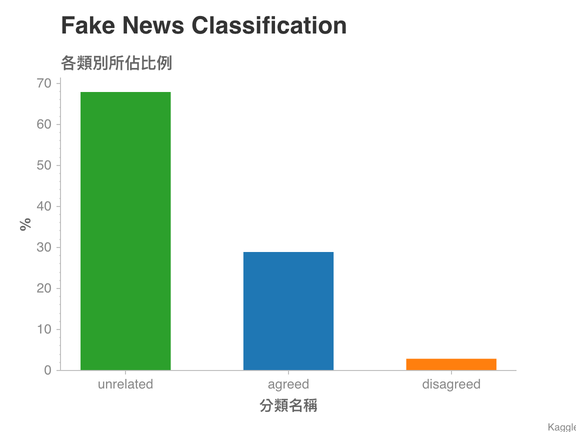

In [9]:
#ignore
import chartify
import pandas as pd

df = pd.DataFrame({'label': ['unrelated', 'agreed', 'disagreed'], 'percentage': [68, 29, 3]})
ch = chartify.Chart(x_axis_type='categorical', layout='slide_75%')
ch.plot.bar(df, 'label', 'percentage', color_column='label')
ch.set_title("Fake News Classification")
ch.set_subtitle("各類別所佔比例")
ch.axes.set_yaxis_label("％")
ch.axes.set_xaxis_label("分類名稱")
ch.set_source_label("Kaggle")

ch.show('png')

這張圖顯示了訓練資料集（Training Set）裏頭各個分類所佔的比例。是一個常見的 Unbalanced Dataset：特定的分類佔了數據的大半比例。

我們可以看到接近 70 % 的「成對新聞」都是不相關的。這邊的「成對新聞」指的是資料集裡，每一行的假新聞標題 A 以及對應的標題 B 所組成的 pairs。

現在假設測試資料集（Test Set）的數據分佈跟訓練資料集相差不遠，且衡量一個分類模型的指標是準確度（Accuracy）：100 組成對新聞中，模型猜對幾組。

這時候如果要你用一個簡單法則來分類所有成對新聞，並同時最大化準確度，你會怎麼做？

!image
- airflow/thought-2123970_1280.jpg

對沒錯，就是全部猜 `unrelated` 就對了！

事實上，此 Kaggle 的 Evaluation 使用 [Weighted Categorization Accuracy](https://www.kaggle.com/c/fake-news-pair-classification-challenge#evaluation)，來調降猜對 `unrelated` 的分數。畢竟（1）能正確判斷出兩個新聞是 `unrelated` 跟（2）能判斷出新聞 B `disagreed` 假新聞 A 的價值是不一樣的。（後者的價值比較高）

但使用[多數票決（Majority Votes）](https://en.wikipedia.org/wiki/Majority_rule)的簡單方法還是能得到 0.666 的成績（滿分為 1）：

!image
- nlp-kaggle-intro/major-baseline.jpg

不過當你前往該 [Kaggle 排行榜](https://www.kaggle.com/c/fake-news-pair-classification-challenge/leaderboard)的時候，卻會發現不少人低於這個標準：

!image
- nlp-kaggle-intro/find-the-baseline-for-ml.jpg

第一次參加 Kaggle 的人可能會覺得這現象很奇怪。

但這是由於 Kaggle 競賽 1 天只能提交 2 次結果，因此通常不會有人浪費提交次數來上傳「多數票決」的結果（儘管分數會上升，大家還是會想把僅僅 2 次的上傳機會用來測試自己的 ML 模型的準確度）；另外也是因為不少人是上傳 1、2 次就放棄比賽了。

但如果你的 ML 或深度學習模型怎樣都無法超過一個簡單法則的 baseline 的話，或許最後上傳該 baseline 的結果也不失為提升排名的最後手段（笑）

!quote
- 找出 Baseline，可以讓我們判斷手上訓練出來的機器學習模型有多少潛在價值、值不值得再繼續花費自己的研究時間與電腦計算能力。

現在我們知道，要保證做出來的模型有點價值，最少要超過 baseline 才可以。以本文來說，就是多數票決法則得到的 0.666 準確度。

（ baseline 的定義依照研究目的以及比較方法而有所不同）

## 資料前處理：讓機器能夠處理文字

要讓電腦或是任何 NLP 模型理解一篇新聞標題在說什麼，我們不能將自己已經非常習慣的語言文字直接扔給電腦，而是要轉換成它熟悉的形式：數字。

!image
- nlp-kaggle-intro/mika-baumeister-703680-unsplash.jpg

因此這章節就是介紹一系列的數據轉換步驟，來將人類熟悉的語言如：

```text
用大蒜鉴别地沟油的方法,怎么鉴别地沟油
```

轉換成人腦不易理解，但很「機器友善」的數字序列：

```text
[217, 1268, 32, 1178, 25, 489, 116, 4]
```

如果你對此步驟已經非常熟悉，可以假設我們已經做完資料前處理，並直接跳到下一章的[有記憶的循環神經網路](#有記憶的循環神經網路_1)。

這章節的數據轉換步驟包含：
- [文本分詞（Text Segmentation）](#文本分詞)
- [建立字典並將文本轉成數字序列](#建立字典並將文本轉成數字序列)
- [序列的 Zero Padding](#序列的-Zero-Padding)
- [將正解做 One-hot Encoding](#將正解做-One-hot-Encoding)

如果你現在不知道上述所有詞彙的意思，別擔心！

你接下來會看到一般的文字數據在丟入機器學習 / 深度學習模型之前，需要經過什麼常見的數據轉換步驟。搭配說明，我相信你可以輕易地理解以下每個數據轉換步驟的邏輯。

在這之前，先讓我們用 [Pandas](https://pandas.pydata.org/) 將訓練資料集讀取進來：

In [1]:
#ignore
TRAIN_CSV_PATH = '../../../kaggle/fake-news-pair-classification-challenge/train.csv'
TRAIN_TOKENIZED_CSV_PATH = '../../../kaggle/fake-news-pair-classification-challenge/train_tokenized.csv'

In [2]:
import pandas as pd
train = pd.read_csv(
    TRAIN_CSV_PATH, index_col=0)
train.head(3)

,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
id,,,,,,,
0,0,1,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,There are two new old-age insurance benefits f...,"Police disprove ""bird's nest congress each per...",unrelated
3,2,3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,"""If you do not come to Shenzhen, sooner or lat...",Shenzhen's GDP outstrips Hong Kong? Shenzhen S...,unrelated
1,2,4,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,"""If you do not come to Shenzhen, sooner or lat...",The GDP overtopped Hong Kong? Shenzhen clarifi...,unrelated


跟我們在 Kaggle 預覽的數據一致。不過為了畫面簡潔，讓我們只選取 2 個中文新聞標題以及分類結果（Label）的欄位：

In [3]:
cols = ['title1_zh', 
        'title2_zh', 
        'label']
train = train.loc[:, cols]
train.head(3)

,title1_zh,title2_zh,label
id,,,
0,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,unrelated
3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,unrelated
1,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,unrelated


有了必要的欄位以後，我們可以開始進行數據的前處理了。

### 文本分詞

[文本分詞（Text Segmentation）](https://en.wikipedia.org/wiki/Text_segmentation)是一個將一連串文字切割成多個有意義單位的步驟。這單位可以是
- 一個中文漢字 / 英文字母（Character）
- 一個中文詞彙 / 英文單字（Word）
- 一個中文句子 / 英文句子（Sentence）

依照不同的 NLP 任務會有不同切割需求，但很常見的切法是以單字（Word）為單位，也就是 Word Segmentation。

以英文來說，Word Segmentation 十分容易。通常只要依照空白分割，就能得到一個有意義的詞彙列表了（在這邊讓我們無視標點符號）：

In [102]:
text = 'I am Meng Lee, a data scientist based in Tokyo.'
words = text.split(' ')
words

['I', 'am', 'Meng', 'Lee,', 'a', 'data', 'scientist', 'based', 'in', 'Tokyo.']

但很明顯地，中文無法這樣做。這時候我們將藉助 [Jieba](https://github.com/fxsjy/jieba) 這個中文斷詞工具，來為一連串的文字做有意義的切割：

In [100]:
import jieba.posseg as pseg

text = '我是李孟，在東京工作的數據科學家'
words = pseg.cut(text)
[word for word in words]

[pair('我', 'r'),
 pair('是', 'v'),
 pair('李孟', 'nr'),
 pair('，', 'x'),
 pair('在', 'p'),
 pair('東京', 'ns'),
 pair('工作', 'vn'),
 pair('的', 'uj'),
 pair('數據', 'n'),
 pair('科學家', 'n')]

如上所示，Jieba 將我們的中文文本切成有意義的詞彙列表，並為每個詞彙附上對應的詞性（Flag）。

假設我們不需要標點符號，則只要將 `flag == x` 的詞彙去除即可。

我們可以寫一個很簡單的 Jieba 斷詞函式，此函式能將輸入的文本 `text` 斷詞，並回傳除了標點符號以外的詞彙列表：

In [99]:
def jieba_tokenizer(text):
    words = pseg.cut(text)
    return ' '.join([
        word for word, flag in words if flag != 'x'])

我們可以利用 Pandas 的 `apply` 函式，將 `jieba_tokenizer` 套用到所有新聞標題 A 以及 B 之上，做文本分詞：

In [ ]:
train['title1_tokenized'] = \
    train.loc[:, 'title1_zh'] \
         .apply(jieba_tokenizer)
train['title2_tokenized'] = \
    train.loc[:, 'title2_zh'] \
         .apply(jieba_tokenizer)

新聞標題 A 的斷詞結果如下：

In [114]:
#ignore
train = pd.read_csv(TRAIN_TOKENIZED_CSV_PATH, index_col=0).iloc[:, 2:]

# 去除空值（只有兩筆）
empty_title = ((train['title2_zh'].isnull()) | (train['title1_zh'].isnull()) | (train['title2_zh'] == '') | (train['title2_zh'] == '0'))
train = train[~empty_title]

# 將 tokenized 結果有數字的設為空字串
train = train.fillna('')

In [115]:
train.iloc[:, [0, 3]].head()

,title1_zh,title1_tokenized
id,,
0,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,2017 养老保险 又 新增 两项 农村 老人 人人 可 申领 你 领到 了 吗
3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
1,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
2,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
9,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",用 大蒜 鉴别 地沟油 的 方法 怎么 鉴别 地沟油


新聞標題 B 的結果則為：

In [116]:
train.iloc[:, [1, 4]].head()

,title2_zh,title2_tokenized
id,,
0,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,警方 辟谣 鸟巢 大会 每人 领 5 万 仍 有 老人 坚持 进京
3,深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,深圳 GDP 首 超 香港 深圳 统计局 辟谣 只是 差距 在 缩小
1,GDP首超香港？深圳澄清：还差一点点……,GDP 首 超 香港 深圳 澄清 还 差 一点点
2,去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,去年 深圳 GDP 首 超 香港 深圳 统计局 辟谣 还 差 611 亿
9,吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,吃 了 30 年 食用油 才 知道 一片 大蒜 轻松 鉴别 地沟油


太棒了，將新聞標題切割成一個個有意義的詞彙以後，我們就能進入下一個步驟了！

另外值得一提的是，不管最後是使用哪種切法，切完之後的每個單字在 NLP 裡頭慣例上被稱之為 Token。（如上例中的「警方」、「GDP」都是所謂的 Token）

### 建立字典並將文本轉成數字序列

當我們將完整的新聞標題切成一個個有意義的詞彙（Token）以後，下一步就是將這些詞彙轉換成一個數字序列，方便電腦處理。

這些數字是所謂的索引（Index），分別對應到特定的詞彙。

!image
- nlp-kaggle-intro/erik-mclean-1118005-unsplash.jpg

為了方便你理解這小節的概念，現在想像個極端的例子。假設我們就只有一個新聞標題：「狐狸被陌生人拍照」。

這時候要怎麼將這個句子轉成一個數字的序列呢？跟上一小節相同，我們首先會對此標題做斷詞，將句子分成多個有意義的詞彙：

In [94]:
text = '狐狸被陌生人拍照'
words = pseg.cut(text)
words = [w for w, f in words]
words

['狐狸', '被', '陌生人', '拍照']

有了詞彙的列表以後，我們可以建立一個字典 `word_index`。

該 dict 裏頭將上面的 4 個詞彙當作鍵值（Key），每個鍵值對應的值（Value）則為不重複的數字：

In [32]:
word_index = {
    word: idx  
    for idx, word in enumerate(words)
}
word_index

{'狐狸': 0, '被': 1, '陌生人': 2, '拍照': 3}

有了這個字典以後，我們就能把該句子轉成一個數字序列：

In [95]:
print(words)
print([word_index[w] for w in words])

['狐狸', '被', '陌生人', '拍照']
[0, 1, 2, 3]


簡單明瞭，不是嗎？

如果來了一個新的句子：「陌生人被狐狸拍照」，我們也能利用手上已有的字典 `word_index` 如法炮製：

In [96]:
text = '陌生人被狐狸拍照'
words = pseg.cut(text)
words = [w for w, f in words]
print(words)
print([word_index[w] for w in words])

['陌生人', '被', '狐狸', '拍照']
[2, 1, 0, 3]


在這個簡單的狐狸例子裡頭，`word_index` 就是我們的字典；我們利用該字典，將 1 句話轉成包含多個數字的序列，而每個數字實際上代表著一個 Token。

同理，我們可以分 4 個步驟將手上的新聞標題全部轉為數字序列：
1. 將已被斷詞的新聞標題 A 以及新聞標題 B 全部倒在一起
2. 建立一個空字典
3. 查看所有新聞標題，裏頭每出現一個字典裡頭沒有的詞彙，就為該詞彙指定一個字典裡頭還沒出現的索引數字，並將該詞彙放入字典
4. 利用建好的字典，將每個新聞標題裡頭包含的詞彙轉換成數字

這種文字前處理步驟因為出現頻率實在太過頻繁，Keras 有專門的文字前處理模組來提升我們的效率：

In [117]:
import keras
MAX_NUM_WORDS = 10000
tokenizer = keras \
    .preprocessing \
    .text \
    .Tokenizer(num_words=MAX_NUM_WORDS)

Tokenizer 顧名思義，即是將一段文字轉換成一系列的詞彙（Tokens），並為其建立字典。這邊的 `num_words=10000` 代表我們限制字典的大小只包含 10,000 個詞彙，一旦字典達到這個大小以後，剩餘的新詞彙都會被視為 Unknown，以避免字典過於龐大。

如同上述的步驟 1，我們得將新聞 A 及新聞 B 的標題全部聚集起來，為它們建立字典：

In [118]:
corpus_x1 = train.title1_tokenized
corpus_x2 = train.title2_tokenized
corpus = pd.concat([
    corpus_x1, corpus_x2])
corpus.shape

(641086,)

因為訓練集有大約 32 萬筆成對新聞（包含 2 筆新聞：A & B），因此將所有新聞放在一起的話，就有 2 倍的大小。而這些文本的集合在習慣上被稱作語料庫（Text Corpus），代表著我們有的所有文本數據。

以下是我們語料庫的一小部分：

In [119]:
pd.DataFrame(corpus.iloc[:5],
             columns=['title'])

,title
id,
0,2017 养老保险 又 新增 两项 农村 老人 人人 可 申领 你 领到 了 吗
3,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
1,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
2,你 不 来 深圳 早晚 你 儿子 也 要 来 不出 10 年 深圳 人均 GDP 将 超 香港
9,用 大蒜 鉴别 地沟油 的 方法 怎么 鉴别 地沟油


有了語料庫以後，接下來就是呼叫 `tokenizer` 為我們查看所有文本，並建立一個字典（步驟 2 & 3）：

In [120]:
tokenizer.fit_on_texts(corpus)

以我們的語料庫大小來說，這大約需時 10 秒鐘。而等到 `tokenizer` 建好字典以後，我們可以進行上述第 4 個步驟，請 `tokenizer` 利用內部生成的字典分別將我們的新聞標題 A 與 新聞 B 轉換成數字序列：

In [121]:
x1_train = tokenizer \
    .texts_to_sequences(corpus_x1)
x2_train = tokenizer \
    .texts_to_sequences(corpus_x2)

In [122]:
#ignore
del corpus_x1
del corpus_x2
del corpus

讓我們看看結果：

In [123]:
len(x1_train)

320543

In [124]:
x1_train[:1]

[[217, 1268, 32, 1178, 5967, 25, 489, 2877, 116, 5559, 4, 1850, 2, 13]]

`x1_train` 為一個 Python `list`，裡頭包含了每一筆假新聞標題 A 對應的數字序列。

讓我們利用 `tokenizer.index_word` 來將索引數字對應回本來的詞彙：

In [125]:
for seq in x1_train[:1]:
    print([tokenizer.index_word[idx] for idx in seq])

['2017', '养老保险', '又', '新增', '两项', '农村', '老人', '人人', '可', '申领', '你', '领到', '了', '吗']


輕鬆寫意，不是嗎？

到此為止，我們已經將所有新聞標題轉成電腦容易處理的數字序列，就只剩一個步驟了！

### 序列的 Zero Padding

雖然我們已經將每個新聞標題的文本轉為一行行的數字序列，你會發現每篇標題的序列長度並不相同：

In [126]:
for seq in x1_train[:10]:
    print(len(seq), seq[:5], ' ...')

14 [217, 1268, 32, 1178, 5967]  ...
19 [4, 10, 47, 678, 2558]  ...
19 [4, 10, 47, 678, 2558]  ...
19 [4, 10, 47, 678, 2558]  ...
9 [31, 320, 3372, 3062, 1]  ...
19 [4, 10, 47, 678, 2558]  ...
6 [7, 2221, 1, 2072, 7]  ...
19 [4, 10, 47, 678, 2558]  ...
14 [1281, 1211, 427, 3, 3244]  ...
9 [31, 320, 3372, 3062, 1]  ...


最長的序列甚至達到 61 個詞彙：

In [127]:
max_seq_len = max([
    len(seq) for seq in x1_train])
max_seq_len

61

而為了方便 NLP 模型處理，一般我們會設定一個 `MAX_SEQUENCE_LENGTH`，讓所有序列的長度一致。

長度超過此數字的序列尾巴會被刪掉；而針對原來長度不足的序列，我們則會在詞彙前面補零。Keras 一樣有個方便函式 `pad_sequences` 幫助我們完成這件工作：

In [128]:
MAX_SEQUENCE_LENGTH = 20
x1_train = keras \
    .preprocessing \
    .sequence \
    .pad_sequences(x1_train, 
                   maxlen=MAX_SEQUENCE_LENGTH)

x2_train = keras \
    .preprocessing \
    .sequence \
    .pad_sequences(x2_train, 
                   maxlen=MAX_SEQUENCE_LENGTH)

一般來說 `MAX_SEQUENCE_LENGTH` 可以設定成最長序列的長度（此例中的 61）。但這邊為了讓模型可以只看前 20 個詞彙就做出判斷以節省訓練時間，我們先暫時使用 20 這個數字。

讓我們看看經過 Zero Padding 的第一篇假新聞標題 A 變成什麼樣子：

In [129]:
x1_train[0]

array([   0,    0,    0,    0,    0,    0,  217, 1268,   32, 1178, 5967,
         25,  489, 2877,  116, 5559,    4, 1850,    2,   13], dtype=int32)

你可以清楚看到，因為該新聞標題原本的序列長度並沒有達到剛剛設定的 `MAX_SEQUENCE_LENGTH`，因此在總長度為 20 的序列中，前面 6 個值被 Keras 補上 0 以說明前 6 個詞彙並不存在。

我們還可以發現，所有的新聞標題都被轉成長度為 20 的數字序列了：

In [130]:
for seq in x1_train + x2_train:
    assert len(seq) == 20
    
print("所有新聞標題的序列長度皆為 20 !")

所有新聞標題的序列長度皆為 20 !


再看一下我們的新聞標題們，現在是長什麼模樣：

In [131]:
x1_train[:5]

array([[   0,    0,    0,    0,    0,    0,  217, 1268,   32, 1178, 5967,
          25,  489, 2877,  116, 5559,    4, 1850,    2,   13],
       [   0,    4,   10,   47,  678, 2558,    4,  166,   34,   17,   47,
        5150,   63,   15,  678, 4502, 3211,   23,  284, 1181],
       [   0,    4,   10,   47,  678, 2558,    4,  166,   34,   17,   47,
        5150,   63,   15,  678, 4502, 3211,   23,  284, 1181],
       [   0,    4,   10,   47,  678, 2558,    4,  166,   34,   17,   47,
        5150,   63,   15,  678, 4502, 3211,   23,  284, 1181],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          31,  320, 3372, 3062,    1,   95,   98, 3372, 3062]],
      dtype=int32)

可以看到每個新聞標題都已經被轉換成長度為 20 的數字序列，每個數字則代表著對應的 Token，整整齊齊。

呼！資料前處理的步驟還真不少！但到此為止，我們已經能將原本以文字呈現的新聞標題以機器容易理解的數字序列表示了。

喔不過，別忘了還有 `label` 這個文字欄位等著我們的處理。

### 將正解做 One-hot Encoding

到目前為止，我們已經將所有的新聞標題以數字型態表示，只剩分類欄位 `label` 要進行從文本到數字的轉換了：

In [132]:
train.label[:5]

id
0    unrelated
3    unrelated
1    unrelated
2    unrelated
9       agreed
Name: label, dtype: object

不過 `label` 的處理相對簡單。跟新聞標題相同，我們一樣需要一個字典將分類的文字轉換成索引：

In [133]:
import numpy as np 

label_to_index = {
    'unrelated': 0, 
    'agreed': 1, 
    'disagreed': 2
}

y_train = train.label.apply(
    lambda x: label_to_index[x])

y_train = np.asarray(y_train) \
            .astype('float32')

y_train[:5]

array([0., 0., 0., 0., 1.], dtype=float32)

現在每個文字標籤都已經被轉成對應的數字，接著讓我們利用 Keras 做 [One-hot Encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)：

In [134]:
y_train = keras \
    .utils \
    .to_categorical(y_train)

y_train[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

上述矩陣的每一列為 1 個 label，而每個 label 從一個數字變成一個 3 維的向量（Vector）。

每 1 維度則對應到 1 個分類：

- `[1, 0, 0]` 代表 label 為 `unrelated`
- `[0, 1, 0]` 代表 label 為 `agreed`
- `[0, 0, 1]` 代表 label 為 `disagreed`

到此為止，所有的數據都已經被我們轉換成可供機器使用的格式了。最後的最後，讓我們將整個資料集拆成[訓練資料集 & 驗證資料集](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) 以方便之後測試模型的效能。

（別哀號，我保證這是最後的前處理步驟了！）

### 切割訓練資料集 & 驗證資料集

這部分很簡單，我們只需決定要將整個訓練資料集（Training Set）的多少比例切出來，當作驗證資料集（Validation Set）。此例中我們用 10 %。

一般來說，我們在訓練時只會讓模型看到訓練資料集，並用模型沒看過的驗證資料集來「模擬」該模型在真實世界的表現。

!image
- nlp-kaggle-intro/train-valid-test-split.png
- 我們會反覆在 Train / Valid Set 上訓練並測試模型，最後用 Test Set 一決生死
- https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

等到模型在驗證資料集也表現得夠好後，便在最終的測試資料集（Test Set）進行最後一次的預測並將該結果上傳到 Kaggle。

要了解為何我們需要驗證資料集可以查看[這邊的討論](https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set)。

簡而言之，當你多次利用驗證資料集的預測結果以修正模型，並讓它在該資料集表現更好時，[過適（Overfitting）](https://zh.wikipedia.org/wiki/%E9%81%8E%E9%81%A9)的風險就已經產生了。

!image
- nlp-kaggle-intro/cat-peep.jpg
- 反覆利用驗證資料集的結果來修正模型表現，事實上就等於讓模型「偷看」到驗證資料集本身的資訊了

儘管你沒有直接讓模型看到驗證資料集（Validation Set）內的任何數據，你還是間接地洩漏了該資料集的重要資訊：你讓模型知道怎樣的參數設定會讓它在該資料集表現比較好，亦或表現較差。

因此有一個完全跟模型訓練過程獨立的測試資料集（Test Set）就顯得重要許多了。（這也是為何我到現在都還沒有碰它的原因）

回歸正題，要切訓練資料集 / 驗證資料集，[scikit-learn](https://scikit-learn.org/stable/documentation.html) 中的 `train_test_split` 函式是一個不錯的選擇：

In [135]:
from sklearn.model_selection \
    import train_test_split

VALIDATION_RATIO = 0.1
RANDOM_STATE = 9527

x1_train, x1_val, \
x2_train, x2_val, \
y_train, y_val = \
    train_test_split(
        x1_train, x2_train, y_train, 
        test_size=VALIDATION_RATIO, 
        random_state=RANDOM_STATE
)

在這邊，我們分別將新聞標題 A `x1_train`、新聞標題 `x2_train` 以及標籤 `y_train` 都分成兩個部分：訓練部分 & 驗證部分。

以假新聞 A 的標題 `x1_train` 為例，本來完整 32 萬筆的 `x1_train` 會被分為包含 90 % 數據的訓練資料集 `x1_train` 以及 10 % 的驗證資料集 `x1_val`。

In [144]:
print("Training Set")
print("-" * 10)
print(f"x1_train: {x1_train.shape}")
print(f"x2_train: {x2_train.shape}")
print(f"y_train : {y_train.shape}")

print("-" * 10)
print(f"x1_val:   {x1_val.shape}")
print(f"x2_val:   {x2_val.shape}")
print(f"y_val :   {y_val.shape}")
print("-" * 10)
print("Test Set")

Training Set
----------
x1_train: (288488, 20)
x2_train: (288488, 20)
y_train : (288488, 3)
----------
x1_val:   (32055, 20)
x2_val:   (32055, 20)
y_val :   (32055, 3)
----------
Test Set


我們可以看到，切割後的訓練資料集有 288,488 筆資料。每一筆資料裡頭，成對新聞標題 A & B 的長度皆為 20 個 Tokens，分類結果則有 3 個；驗證資料集的內容一模一樣，僅差在資料筆數較少（32,055 筆）。

到此為此，資料前處理大功告成！

既然我們已經為機器準備好它們容易理解的數字序列資料，接著就讓我們來看看要使用怎麼樣的 NLP 模型來處理這些數據。

## 有記憶的循環神經網路

這次的 Kaggle 競賽，我使用[循環神經網路（Recurrent Neural Network, 後簡稱 RNN）](https://zh.wikipedia.org/wiki/%E9%80%92%E5%BD%92%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C)來處理我們剛剛得到的序列數據。

RNN 是一種有「記憶力」的神經網路，其最為人所知的形式如下：

!image
- nlp-kaggle-intro/rnn-static.png

如同上圖等號左邊所示，RNN 跟一般深度學習中常見的[前饋神經網路（Feedforward Neural Network, 後簡稱 FFNN）](https://en.wikipedia.org/wiki/Feedforward_neural_network)最不一樣的地方在於它有一個迴圈（Loop）。

要了解這個迴圈在 RNN 裏頭怎麼運作，現在讓我們想像有一個輸入序列 X（Input Sequence）其長相如下：

```text
X = [ x0, x1, x2, ... xt ]
```

不同於 FFNN，RNN 在第一個時間點 `t0` 並不會直接把整個序列 X 讀入。反之，在第一個時間點 `t0`，它只將該序列中的第一個元素 `x0` 讀入中間的細胞 A。細胞 A 則會針對 `x0` 做些處理以後，更新自己的「狀態」並輸出第一個結果 `h0`。

!image
- nlp-kaggle-intro/rnn-static.png

在下個時間點 `t1`，RNN 如法炮製，讀入序列 X 中的下一個元素 `x1`，並利用剛剛處理完 `x0` 得到的細胞狀態，處理 `x1` 並更新自己的狀態（也被稱為記憶），接著輸出另個結果 `h1`。

剩下的 `xt` 都會被以同樣的方式處理。但不管輸入的序列 X 有多長，RNN 的本體從頭到尾都是等號左邊的樣子：迴圈代表細胞 A 利用「上」一個時間點（比方說 `t1`）儲存的狀態，來處理當下的輸入（比方說 `x2` ）。

!image
- nlp-kaggle-intro/rnn-static.png

但如果你將不同時間點（`t0`、`t1` ...）的 RNN 以及它的輸入一起截圖，並把所有截圖從左到右一字排開的話，就會長得像等號右邊的形式。

將 RNN 以右邊的形式表示的話，你可以很清楚地了解，當輸入序列越長，向右展開的 RNN 也就越長。（模型也就需要更多參數，這也是為何我們在資料前處理時需要[設定序列的最長長度](#序列的-Zero-Padding)）

為了確保你 100 % 理解 RNN，讓我們假設剛剛的序列 X 實際上是一個內容如下的英文問句：

```text
X = [ What, time, is, it, ? ]
```

而且 RNN 已經處理完前兩個元素 `What` 和 `time`。

接下來，RNN 會這樣處理剩下的句子：

!image
- nlp-kaggle-intro/rnn-animate.gif
- RNN 一次只讀入並處理序列的「一個」元素
- https://www.youtube.com/watch?time_continue=2&v=LHXXI4-IEns

現在你可以想像為何 RNN 非常適合拿來處理像是自然語言這種序列數據了。

就像你現在閱讀這段話一樣，你是由左到右逐字在大腦裡處理我現在寫的文字，同時不斷地更新你腦中的記憶狀態。每個新看到的詞彙都跟
- 前面所有已讀的詞彙
- 目前腦中的記憶狀態

這兩者相關。

當然，人腦實際的機制更為複雜，但 RNN 抓到這個處理精髓，利用內在迴圈以及細胞內的「記憶」來處理序列資料。

!image
- nlp-kaggle-intro/thought-catalog-196661-unsplash.jpg
- RNN 一次一段、按照順序處理詞彙的機制跟我們理解自然語言的方式有些相似

到此為止，你應該已經了解 RNN 的基本運作方式了。現在你可能會問：「那我們該如何實作一個 RNN 呢？」

這邊是一個簡單到爆炸的 RNN 實現：

```python
state_t = 0
for input_t in input_sequence:
    output_t = f(input_t, state_t)
    state_t = output_t
```

在 RNN 還沒有讀入任何資訊時，細胞 A 中的狀態 / 記憶 `state_t` 會被初始化為 0。

接著在每個時間點 `t`，RNN 會重複以下步驟：
- 讀入 `input_sequence` 序列中的一個新元素 `input_t`
- 利用 `f` 函式將當前細胞的狀態 `state_t` 以及輸入 `input_t` 做些處理產生 `output_t`
- 輸出 `output_t` 並同時更新自己的狀態 `state_t`

不需要自己發明輪子，在 Keras 裏頭只要 2 行就可以建立一個 RNN layer：

```python
from keras import layers
rnn = layers.SimpleRNN(NUM_UNITS)
```

使用深度學習框架可以幫我們省下非常多的寶貴時間。

我們後面還會看到，一個完整的神經網路通常會分成好幾層（layer）：每一層取得前一層的結果作為輸入，進行特定的資料轉換後再輸出給下一層。

參數 `NUM_UNITS` 則代表此 RNN 會有多少個輸出（如上圖的 `O1`、`O2` 等）。此值基本上跟我們序列的最長長度相同。

好啦，現在你應該已經掌握基本 RNN 的精髓了，讓我們看看一個 RNN 的知名變形：LSTM。

## 記憶力好的 LSTM 細胞

In [ ]:
- [暹羅貓拯救世界](#)
- [深度學習 3 步驟](#)
    三個步驟：決定 hypothesis space -> optimize 的方式 -> train
- [第一個模型結果](#)
- [站在巨人的肩膀上](#)
- [輪到 Colab 登場](#)
- [持續改進結果](#)
- [所以 AI 學到了什麼](#)

## 換你上場：3 門推薦課程

為了奠定 NLP 的基礎，這一個月我邊複習邊看了不少新的教學文章以及線上課程。

截至目前，我認為有 3 個 CP 值十分高的課程值得推薦給你：
1. 台大電機系李宏毅教授的[深度學習以及機器學習課程](http://speech.ee.ntu.edu.tw/~tlkagk/courses_MLDS18.html)
    - 奠定理論基礎
2. [deeplearning.ai](https://www.deeplearning.ai/) 在 Coursera 上的[ Deep Learning 專項課程](https://www.coursera.org/specializations/deep-learning)
    - 理論 70 % + 實作 30 %
3. 深度學習框架 [Keras](https://keras.io/) 作者 [François Chollet](https://ai.google/research/people/105096) 的 [Deep Learning with Python Video Edition](https://www.oreilly.com/library/view/deep-learning-with/9781617294433VE/)
    - 注重程式實作

這邊說的 CP 值高（對，我知道你最愛 CP 值）指的是能用最少的時間、精力以及金錢來確確實實地學好 NLP 的理論及實作基礎。

!image
- nlp-kaggle-intro/Hung-yi-Lee-ml-courses.jpg
- 李宏毅教授的 Youtube 播放清單
- https://www.youtube.com/channel/UC2ggjtuuWvxrHHHiaDH1dlQ/playlists

[李宏毅教授](http://www.ee.ntu.edu.tw/profile?id=1020908)的機器學習課程內行的都知道，大概是全世界最好、最完整的 Deep Learning 中文學習資源。李教授在課程中廣徵博引學術論文，但卻同時非常淺顯易懂。你可以在這邊看到[教授所有的 Youtube 課程播放清單](https://www.youtube.com/channel/UC2ggjtuuWvxrHHHiaDH1dlQ/playlists)。

就我所知，教授在台大上課很注重實作，有不少作業需要完成，但因為線上只有影片可以查看，因此我將其分類為「奠定理論基礎」。

!image
- nlp-kaggle-intro/deeplearning-ai-courses.jpg
- Deep Learning Specialization
- https://www.coursera.org/specializations/deep-learning

原 Google Brain 的[吳恩達教授](https://zh.wikipedia.org/wiki/%E5%90%B4%E6%81%A9%E8%BE%BE)的 [Deep Learning 專項課程](https://www.coursera.org/specializations/deep-learning)則是 Coursera 上最受歡迎的深度學習課程。跟我們這篇文章最相關的 NLP 技術則被涵蓋在該專項課程的最後一堂課：[Sequence Models](https://www.coursera.org/learn/nlp-sequence-models)。

我在大約一年前完成包含[卷積神經網路 CNN](https://www.coursera.org/learn/convolutional-neural-networks) 的前四堂課，而因為課程上線已有一段時間，現在影片大都有簡體或繁體中文的字幕，不太需要煩惱聽不懂英文。

!image
- nlp-kaggle-intro/deeplearning-with-python.jpg

[Deep Learning with Python Video Edition](https://www.oreilly.com/library/view/deep-learning-with/9781617294433VE/) 的作者 [François Chollet](https://ai.google/research/people/105096) 為軟體工程師出身，設計出知名深度學習框架 Keras，目前則在 Google AI 工作。

該書以 Programmer 的角度出發，提供了利用 Keras 實現各種 NLP 任務的範例，十分適合在熟悉深度學習理論後想要實作的人閱讀。

就算你不想花錢買書或是訂閱 [O'Relly Online](https://www.safaribooksonline.com)，你也可以在他有 5,000 多顆星的 Github Repo [deep-learning-with-python-notebooks](https://github.com/fchollet/deep-learning-with-python-notebooks) 看到跟該課程相關的所有 Jupyter Notebooks。

!image
- nlp-kaggle-intro/maxwell-ridgeway-685077-unsplash.jpg

這些課程可以說是幫助我完成這次 Kaggle 競賽的最大功臣們，而我也希望能透過這篇文章的微薄之力，讓你知道他們的存在，並實際隨著他們踏上你自己的 NLP 之旅。

!image
- nlp-kaggle-intro/my-nlp-timeline.jpg

- Encoder-decoder : sequence generation
- Attention: 讓 Decoder 決定要看 encoder 哪部分來做翻譯
- Transfomer
    - 讓 Encoder 利用 SELF-attention 來 better encode 一個字（The animal didn't cross the street because it was too tired）
    - multi-attention head. 相較於 RNN, transformer 在同個時間點放入整個 seq, 每個 token 處理為獨立，因此能平行化加快運算，解決一個 RNN 痛點。但因為這樣就沒有隱含類似 RNN 不同 timestep 的 seq order，因此除了 token 本身的 embed 以外會加上 positional embed
- BERT
    - 所以你現在可以想像 BERT 名稱裡頭的數字代表什麼：L 為層數，A 代表 #attention_head ，一億參數

- summary: Simple RNN —> LSTM —> encoder-decoder —> attention-based model —> transformer —> BERT

## 結語
- (呼應封面圖片, 實際上kaggle 競賽是大家差距很小擠成一團，但在我想像中，我就像是個小孩，想要突破自己，前往那未知的轉角）

 - 我從很多好的 reference 學到很多，感謝他們的回饋，也希望能將自己像他們一樣回饋社會。
    - 接下來是 NMT，除了本文以後，我目前正在編文列出自己的目前的所有推薦學習資源，歡迎 subscribe 來了解進展
